#### Data Science ANanodegree First Project 

I have started this project as part of the Data Science Nanodegree program offered by Udacity. In order to complete this project I have used the CRIS-DM method. 

#### Business Understanding

The data used for this assignment was download from the Kaggle platform offering insights on the Seattle AirBNB homes data. The main purpose of this project is to offer a high-level overview over the accommodation offer in Seattle by answering the following questions:

1. How can we describe the Seattle accommodation offer?
2. Can we predict the price established for an accommodation based on the facilities listed by the host?
3. What factors seem to have a strong impact in receiving a Superhost badge?


#### Data Understanding

Importing the necessary libraries.

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

We will just start by importing the data.

In [22]:
df = pd.read_csv('./Database/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Checking to see the number of rows and columns.

In [13]:
number_of_rows = df.shape[0] 
number_of_columns = df.shape[1] 
print('The Seattle database has',number_of_rows, 'rows and', number_of_columns, 'columns.' )

The Seattle database has 3818 rows and 92 columns.


Checking all the columns by the proportion of missing values.

In [18]:
not_missing = set(df.columns[df.isnull().mean()== 0]) 
print('The following columns have no missing values:',not_missing)

The following columns have no missing values: {'require_guest_phone_verification', 'room_type', 'neighbourhood_group_cleansed', 'price', 'market', 'number_of_reviews', 'neighbourhood_cleansed', 'calendar_last_scraped', 'picture_url', 'extra_people', 'require_guest_profile_picture', 'country_code', 'street', 'is_location_exact', 'last_scraped', 'availability_365', 'bed_type', 'instant_bookable', 'state', 'requires_license', 'has_availability', 'longitude', 'cancellation_policy', 'experiences_offered', 'host_verifications', 'guests_included', 'id', 'maximum_nights', 'amenities', 'jurisdiction_names', 'accommodates', 'minimum_nights', 'calendar_updated', 'smart_location', 'host_id', 'description', 'latitude', 'availability_30', 'listing_url', 'scrape_id', 'city', 'country', 'availability_90', 'availability_60', 'host_url', 'calculated_host_listings_count', 'name'}


In [21]:
mostly_missing_75 = set(df.columns[df.isnull().mean()>0.75])
mostly_missing_50 = set(df.columns[df.isnull().mean()>0.50])
mostly_missing_25 = set(df.columns[df.isnull().mean()>0.25])
print('The following columns have more than 75% missing values:',mostly_missing_75)
print('The following columns have more than 50% missing values:',mostly_missing_50)
print('The following columns have more than 25% missing values:',mostly_missing_25)

The following columns have more than 75% missing values: {'square_feet', 'license'}
The following columns have more than 50% missing values: {'license', 'monthly_price', 'square_feet', 'security_deposit'}
The following columns have more than 25% missing values: {'cleaning_fee', 'license', 'notes', 'monthly_price', 'neighborhood_overview', 'security_deposit', 'square_feet', 'weekly_price'}


In [20]:
(np.sum(df.isnull())/df.shape[0])

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 92, dtype: float64

Overview over the general data

In [22]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


 #### How can we describe the Seattle accommodation offer?

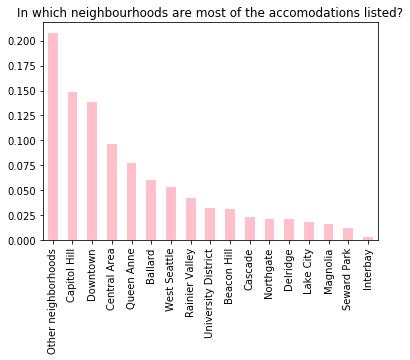

In [36]:
neigh_vals = df['neighbourhood_group_cleansed'].value_counts()

(neigh_vals/df.shape[0]).plot(kind="bar", color='pink' );
plt.title("In which neighbourhoods are most of the accomodations listed?");

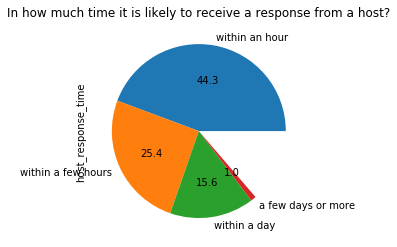

In [80]:
host_resp_vals = df['host_response_time'].value_counts()

(host_resp_vals/df.shape[0]).plot(kind="pie", autopct='%.1f');
plt.title("In how much time it is likely to receive a response from a host?");

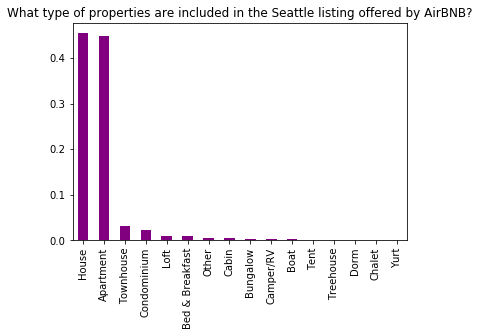

In [37]:
prop_type_vals = df['property_type'].value_counts()

(prop_type_vals/df.shape[0]).plot(kind="bar", color='purple');
plt.title("What type of properties are included in the Seattle listing offered by AirBNB?");

In [45]:
df['property_type'].value_counts()/(df.shape[0] - sum(df['property_type'].isnull()))

House              0.454021
Apartment          0.447472
Townhouse          0.030914
Condominium        0.023841
Loft               0.010479
Bed & Breakfast    0.009693
Other              0.005764
Cabin              0.005502
Bungalow           0.003406
Camper/RV          0.003406
Boat               0.002096
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64

In [43]:
pd.DataFrame(df.groupby(['room_type']).mean()['availability_365'].round())

,availability_365
room_type,
Entire home/apt,233.0
Private room,264.0
Shared room,297.0


In [44]:
pd.DataFrame(df.groupby(['property_type']).mean()['availability_365'].round())

,availability_365
property_type,
Apartment,239.0
Bed & Breakfast,267.0
Boat,284.0
Bungalow,254.0
Cabin,242.0
Camper/RV,263.0
Chalet,333.0
Condominium,211.0
Dorm,213.0


In [55]:
pd.DataFrame(df.groupby(['host_is_superhost', 'room_type']).mean()['availability_365'].round())

availability_365
host_is_superhost room_type                        
f                 Entire home/apt             233.0
                  Private room                266.0
                  Shared room                 306.0
t                 Entire home/apt             235.0
                  Private room                256.0
                  Shared room                 209.0

In [38]:
pd.DataFrame(df.groupby(['city', 'room_type']).mean()['availability_365'].round())

availability_365
city                  room_type                        
Ballard, Seattle      Entire home/apt             289.0
Phinney Ridge Seattle Entire home/apt              15.0
Seattle               Entire home/apt             233.0
                      Private room                264.0
                      Shared room                 297.0
Seattle               Entire home/apt             331.0
                      Private room                344.0
West Seattle          Private room                362.0
seattle               Private room                365.0
西雅图                   Private room                171.0

In [57]:
df['city'].value_counts()/(df.shape[0] - sum(df['city'].isnull()))

Seattle                  99.790466
Seattle                   0.052383
West Seattle              0.052383
seattle                   0.026192
西雅图                       0.026192
Phinney Ridge Seattle     0.026192
Ballard, Seattle          0.026192
Name: city, dtype: float64

#### What factors seem to have a strong impact in receiving a Superhost badge?

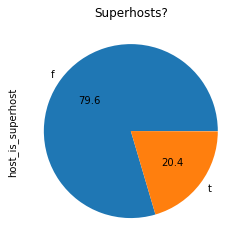

In [79]:
host_resp_vals = df['host_is_superhost'].value_counts()

(host_resp_vals/df.shape[0]).plot(kind="pie", autopct='%.1f');
plt.title("Superhosts?");

In [68]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'host_has_profile_pic']).count()['host_id'])

host_id
host_is_superhost host_has_profile_pic         
t                 f                           1
                  t                         777

In [69]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'host_identity_verified']).count()['host_id'])

host_id
host_is_superhost host_identity_verified         
t                 f                            75
                  t                           703

In [70]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'host_response_time']).count()['host_id'])

host_id
host_is_superhost host_response_time         
t                 a few days or more        1
                  within a day             57
                  within a few hours      198
                  within an hour          489

In [71]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'cancellation_policy']).count()['host_id'])

host_id
host_is_superhost cancellation_policy         
t                 flexible                 142
                  moderate                 301
                  strict                   335

In [72]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'require_guest_profile_picture']).count()['host_id'])

host_id
host_is_superhost require_guest_profile_picture         
t                 f                                  670
                  t                                  108

In [73]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'require_guest_phone_verification']).count()['host_id'])

host_id
host_is_superhost require_guest_phone_verification         
t                 f                                     654
                  t                                     124

In [66]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'property_type']).count()['host_id'])

host_id
host_is_superhost property_type           
t                 Apartment            319
                  Bed & Breakfast        8
                  Bungalow               1
                  Cabin                 14
                  Camper/RV              4
                  Condominium           14
                  House                381
                  Loft                  11
                  Other                  2
                  Townhouse             22
                  Treehouse              1
                  Yurt                   1

In [74]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'has_availability']).count()['host_id'])

,,host_id
host_is_superhost,has_availability,
t,t,778


In [75]:
pd.DataFrame(df.query("host_is_superhost == 't'").groupby(['host_is_superhost', 'instant_bookable']).count()['host_id'])

host_id
host_is_superhost instant_bookable         
t                 f                     612
                  t                     166

#### Data Preparation and Modeling

#### Can we predict the price established for an accommodation based on the facilities listed by the host?
We want to predict the price of an accomodation taking into consideration the following columns: host_response_rate, host_acceptance_rate, accommodates, bathrooms, bedrooms, beds, guests_included, extra_people, minimum_nights, maximum_nights, availability_365, number_of_reviews, review_scores_rating, reviews_per_month. 

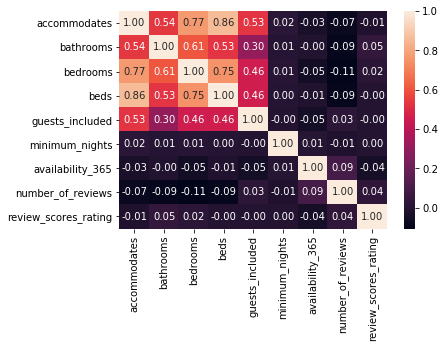

In [81]:
sns.heatmap(df[['price','host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',  'minimum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating']].corr(), annot=True, fmt=".2f");

In [82]:
#I had to remove the $ sign in order to use the price column in the regression analysis
df['price'] = df['price'].replace('[$,]', '', regex = True).astype('float')
df['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [83]:
#I droped the rows with missing data
new_df = df.dropna(subset = ['price','accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews'], axis = 0)
new_df.shape

(3796, 92)

From the previous correlation matrix I have decided to keep only some of the data: accommodates, bathrooms, bedrooms, beds, guests_included, number_of_reviews.

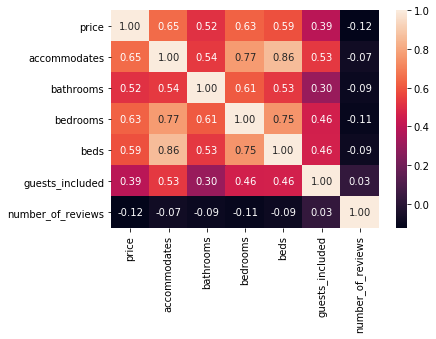

In [84]:
sns.heatmap(df[['price','accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']].corr(), annot=True, fmt=".2f");

#### Regression Model (considering dropping missing values)

In [85]:
#Separated the independent variables from the dependent one (price)
new_df = df[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']]
new_df_notnull = new_df.dropna(axis=0)

#Split into explanatory and response variables
X = new_df_notnull[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']]
y = new_df_notnull['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=13) 

#Create the model
lm_model = LinearRegression(normalize=True)
#Fitt the model
lm_model.fit(X_train, y_train) 
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))
print('Coefficients:', lm_model.coef_)
print('Intercept:', lm_model.intercept_)

The r-squared score for your model was 0.5320522574782711 on 1139 values.
Coefficients: [15.67548796 27.60607269 21.96328014 -0.4126875   4.00425544 -0.15265245]
Intercept: 9.918136824145861


#### Regression Model (considering imputing missing values)

In [86]:
#Separated the independent variables from the dependent one (price)
new_df = df[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']]
new_df = new_df.dropna(subset=['price'], axis=0) 
np.sum(new_df['price'].isnull())

0

In [87]:
#Fill all missing values with the mean of the column.
fill_mean = lambda col: col.fillna(col.mean())

new_df_imputed = new_df[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']].apply(fill_mean, axis=0)

# test look
np.sum(new_df_imputed.isnull())

price                0
accommodates         0
bathrooms            0
bedrooms             0
beds                 0
guests_included      0
number_of_reviews    0
dtype: int64

In [88]:
#Split into explanatory and response variables
X = new_df_imputed[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']]
y = new_df_imputed['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=13) 

#Create the model
lm_model = LinearRegression(normalize=True)
#Fitt the model
lm_model.fit(X_train, y_train) 
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))
print('Coefficients:', lm_model.coef_)
print('Intercept:', lm_model.intercept_)

The r-squared score for your model was 0.49596129819906 on 1146 values.
Coefficients: [16.05071968 22.4035685  23.61564987  1.1116621   3.36903971 -0.13199625]
Intercept: 10.66588026840293


####  What factors seem to have a strong impact in being confirmed as a Superhost by Airbnb?

In order to investigate the top factors of impact related to the Superhost badge, I decided to use the following data: host_has_profile_pic, host_identity_verified, property_type, has_availability, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, host_response_time.

In [89]:
df_binary = df[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'has_availability', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_response_time']]
df_binary.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,has_availability,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_time
0,f,t,t,Apartment,t,f,moderate,f,f,within a few hours
1,t,t,t,Apartment,t,f,strict,t,t,within an hour
2,f,t,t,House,t,f,strict,f,f,within a few hours
3,f,t,t,Apartment,t,f,flexible,f,f,NaN
4,f,t,t,House,t,f,strict,f,f,within an hour


In [90]:
df_binary = df_binary.dropna(subset = ['host_is_superhost'], axis=0) 
np.sum(df_binary['host_is_superhost'].isnull())

0

In [5]:
fill_mode = lambda col: col.fillna(col.mode()[0])

new_df_binary = df_binary[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'has_availability', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_response_time']].apply(fill_mode, axis=0)

# test look
np.sum(new_df_binary.isnull())

host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
property_type                       0
has_availability                    0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
host_response_time                  0
dtype: int64

In [91]:
binary_data = pd.get_dummies(new_df_binary)
binary_data.head()

,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,...,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,1,0,0,1,0,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
1,0,1,0,1,0,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1


In [92]:
X = binary_data[['host_has_profile_pic_t', 'host_identity_verified_t','property_type_Apartment', 'has_availability_t', 'instant_bookable_t', 'cancellation_policy_strict', 'require_guest_profile_picture_t', 'require_guest_phone_verification_t', 'host_response_time_within an hour']]
y = binary_data['host_is_superhost_t']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8049419692998877
The test accuracy is 0.8192139737991266
